In [1]:
import json
import re
import pandas as pd

In [2]:
def extract_json_from_html(html_path, save_output=False):
    html_file = open(html_path, 'r')
    html = html_file.read()
    html_file.close()
    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for json parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')

    if save_output:
        # save json data to txt
        output_file = open(f"{html_path}.txt", "wt")
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt

In [3]:
def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict

In [4]:
match_html_path = '../input/ausrb33/Cremonese 0-0 AC Milan - Serie A 2022_2023 Live.html'
json_data_txt = extract_json_from_html(match_html_path)
data = json.loads(json_data_txt)
events_dict, players_df, teams_dict = extract_data_from_dict(data)

In [5]:
players_df

,playerId,shirtNo,name,position,height,weight,age,isFirstEleven,isManOfTheMatch,field,stats,subbedInPlayerId,subbedOutPeriod,subbedOutExpandedMinute,subbedInPeriod,subbedInExpandedMinute,subbedOutPlayerId,teamId
0,383278,12,Marco Carnesecchi,GK,191,83,22,True,False,home,"{'totalSaves': {'8': 1.0, '25': 1.0, '35': 1.0...",NaN,NaN,NaN,NaN,NaN,NaN,2731
1,399624,4,Emanuel Aiwu,DC,185,82,21,True,False,home,"{'possession': {'1': 1.0, '2': 1.0, '3': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,2731
2,105249,15,Matteo Bianchetti,DC,189,81,29,True,False,home,"{'possession': {'9': 1.0, '15': 1.0, '17': 1.0...",NaN,NaN,NaN,NaN,NaN,NaN,2731
3,425115,5,Johan Vásquez,DC,182,72,24,True,False,home,"{'possession': {'5': 1.0, '8': 1.0, '9': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,2731
4,259931,18,Paolo Ghiglione,DMR,187,80,25,True,False,home,"{'possession': {'1': 1.0, '3': 1.0, '10': 2.0,...",289293.0,"{'value': 2, 'displayName': 'SecondHalf'}",62.0,NaN,NaN,NaN,2731
5,343512,3,Emanuele Valeri,DML,180,78,23,True,False,home,"{'possession': {'5': 1.0, '8': 1.0, '11': 1.0,...",393081.0,"{'value': 2, 'displayName': 'SecondHalf'}",88.0,NaN,NaN,NaN,2731
6,127764,32,Gonzalo Escalante,MC,182,76,29,True,False,home,"{'possession': {'1': 1.0, '3': 1.0, '5': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,2731
7,105161,28,Soualiho Meïté,MC,187,80,28,True,False,home,"{'possession': {'1': 1.0, '5': 2.0, '6': 2.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,2731
8,109367,19,Michele Castagnetti,MC,180,71,32,True,False,home,"{'possession': {'1': 1.0, '2': 1.0, '5': 2.0, ...",316532.0,"{'value': 2, 'displayName': 'SecondHalf'}",70.0,NaN,NaN,NaN,2731
9,426915,20,Felix Afena-Gyan,FW,175,62,19,True,False,home,"{'possession': {'8': 1.0, '10': 2.0, '14': 1.0...",122620.0,"{'value': 2, 'displayName': 'SecondHalf'}",63.0,NaN,NaN,NaN,2731


In [6]:
df1=pd.DataFrame(events_dict)

In [7]:
df1

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,endX,endY,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,relatedEventId,relatedPlayerId,cardType
0,2.483348e+09,2,0,0.0,2731,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.483348e+09,2,0,0.0,80,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.483348e+09,3,0,0.0,80,49.9,50.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,52.5,50.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.483348e+09,4,0,1.0,80,53.2,45.2,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,55.4,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.483348e+09,5,0,3.0,80,54.8,16.3,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,35.1,22.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,2.483445e+09,1018,95,58.0,80,0.0,0.0,96,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 30, 'displayName': 'End'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,2.483445e+09,1019,0,0.0,80,0.0,0.0,6,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,2.483445e+09,636,0,0.0,2731,0.0,0.0,6,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,2.483317e+09,1,0,0.0,2731,0.0,0.0,0,"{'value': 16, 'displayName': 'PreMatch'}","{'value': 34, 'displayName': 'FormationSet'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def get_passes_df(events_dict):
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)

    # create receiver column based on the next event
    # this will be correct only for successfull passes
    df["receiver"] = df["playerId"].shift(-1)

    # filter only passes
    passes_ids = df.index[df['eventType'] == 'Pass']
    df_passes = df.loc[
        passes_ids, ["id", "x", "y", "endX", "endY", "teamId", "playerId", "receiver", "eventType", "outcomeType"]]

    return df_passes

In [9]:
passes_df = get_passes_df(events_dict)
passes_df.head()

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType
2,2.483348e+09,49.9,50.0,52.5,50.4,80,124688.0,317541.0,Pass,Successful
3,2.483348e+09,53.2,45.2,55.4,13.9,80,317541.0,401098.0,Pass,Successful
4,2.483348e+09,54.8,16.3,35.1,22.3,80,401098.0,393355.0,Pass,Successful
5,2.483348e+09,34.4,24.4,26.7,49.1,80,393355.0,20769.0,Pass,Successful
6,2.483348e+09,29.3,51.5,40.6,90.5,80,20769.0,317507.0,Pass,Successful


In [10]:
def get_passes_between_df(team_id, passes_df, players_df):
    # filter for only team
    passes_df = passes_df[passes_df["teamId"] == team_id]

    # add column with first eleven players only
    passes_df = passes_df.merge(players_df[["playerId", "isFirstEleven"]], on='playerId', how='left')
    # filter on first eleven column
    passes_df = passes_df[passes_df['isFirstEleven'] == True]

    # calculate mean positions for players
    average_locs_and_count_df = (passes_df.groupby('playerId')
                                 .agg({'x': ['mean'], 'y': ['mean', 'count']}))
    average_locs_and_count_df.columns = ['x', 'y', 'count']
    average_locs_and_count_df = average_locs_and_count_df.merge(players_df[['playerId', 'name', 'shirtNo', 'position']],
                                                                on='playerId', how='left')
    average_locs_and_count_df = average_locs_and_count_df.set_index('playerId')

    # calculate the number of passes between each position (using min/ max so we get passes both ways)
    passes_player_ids_df = passes_df.loc[:, ['id', 'playerId', 'receiver', 'teamId']]
    passes_player_ids_df['pos_max'] = (passes_player_ids_df[['playerId', 'receiver']].max(axis='columns'))
    passes_player_ids_df['pos_min'] = (passes_player_ids_df[['playerId', 'receiver']].min(axis='columns'))

    # get passes between each player
    passes_between_df = passes_player_ids_df.groupby(['pos_min', 'pos_max']).id.count().reset_index()
    passes_between_df.rename({'id': 'pass_count'}, axis='columns', inplace=True)

    # add on the location of each player so we have the start and end positions of the lines
    passes_between_df = passes_between_df.merge(average_locs_and_count_df, left_on='pos_min', right_index=True)
    passes_between_df = passes_between_df.merge(average_locs_and_count_df, left_on='pos_max', right_index=True,
                                                suffixes=['', '_end'])
    return passes_between_df, average_locs_and_count_df

In [11]:
home_team_id = list(teams_dict.keys())[0]  # selected home team
home_passes_between_df, home_average_locs_and_count_df = get_passes_between_df(home_team_id, passes_df, players_df)


In [12]:
away_team_id = list(teams_dict.keys())[1]  # selected home team
away_passes_between_df, away_average_locs_and_count_df = get_passes_between_df(away_team_id, passes_df, players_df)

In [13]:
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 745.6 kB/s eta 0:00:00


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba
from mplsoccer import Pitch, FontManager

In [15]:
def pass_network_visualization(ax, passes_between_df, average_locs_and_count_df, flipped=False):
    MAX_LINE_WIDTH = 10
    MAX_MARKER_SIZE = 3000
    passes_between_df['width'] = (passes_between_df.pass_count / passes_between_df.pass_count.max() *
                                  MAX_LINE_WIDTH)
    average_locs_and_count_df['marker_size'] = (average_locs_and_count_df['count']
                                                / average_locs_and_count_df['count'].max() * MAX_MARKER_SIZE)

    MIN_TRANSPARENCY = 0.3
    color = np.array(to_rgba('#507293'))
    color = np.tile(color, (len(passes_between_df), 1))
    c_transparency = passes_between_df.pass_count / passes_between_df.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency

    pitch = Pitch(pitch_type='opta', pitch_color='#FFFFFF', line_color='#5B6378')
    pitch.draw(ax=ax)

    if flipped:
        passes_between_df['x'] = pitch.dim.right - passes_between_df['x']
        passes_between_df['y'] = pitch.dim.right - passes_between_df['y']
        passes_between_df['x_end'] = pitch.dim.right - passes_between_df['x_end']
        passes_between_df['y_end'] = pitch.dim.right - passes_between_df['y_end']
        average_locs_and_count_df['x'] = pitch.dim.right - average_locs_and_count_df['x']
        average_locs_and_count_df['y'] = pitch.dim.right - average_locs_and_count_df['y']

    pass_lines = pitch.lines(passes_between_df.x, passes_between_df.y,
                             passes_between_df.x_end, passes_between_df.y_end, lw=passes_between_df.width,
                             color=color, zorder=1, ax=ax)
    pass_nodes = pitch.scatter(average_locs_and_count_df.x, average_locs_and_count_df.y,
                               s=average_locs_and_count_df.marker_size, marker='h',
                               color='#DD5353', edgecolors='#04395E', linewidth=1, alpha=1, ax=ax)
    for index, row in average_locs_and_count_df.iterrows():
        player_name = row["name"].split()
        player_initials = "".join(word[0] for word in player_name).upper()
        pitch.annotate(player_initials, xy=(row.x, row.y), c='#F9C22E', va='center',
                       ha='center', size=14, ax=ax)

    return pitch

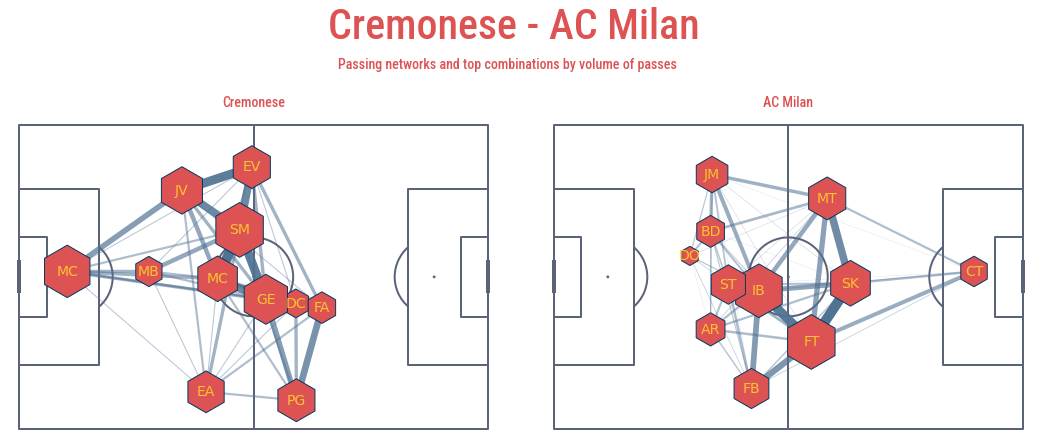

In [16]:
# create plot
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
axes = axes.flat
plt.tight_layout()
fig.set_facecolor("#FFFFFF")

# plot variables
main_color = '#DD5353'
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "RobotoCondensed-Medium.ttf?raw=true"))

# home team viz
pass_network_visualization(axes[0], home_passes_between_df, home_average_locs_and_count_df)
axes[0].set_title(teams_dict[home_team_id], color=main_color, fontsize=14, fontproperties=font_bold.prop)

# away team viz
pass_network_visualization(axes[1], away_passes_between_df, away_average_locs_and_count_df, flipped=True)
axes[1].set_title(teams_dict[away_team_id], color=main_color, fontsize=14, fontproperties=font_bold.prop)

plt.suptitle(f"{teams_dict[home_team_id]} - {teams_dict[away_team_id]}", color=main_color, fontsize=42, fontproperties=font_bold.prop)
subtitle = "Passing networks and top combinations by volume of passes"
plt.text(-10, 120, subtitle, horizontalalignment='center', verticalalignment='center', color=main_color, fontsize=14, fontproperties=font_bold.prop)
plt.savefig('PSGOL.png', bbox_inches='tight')
plt.show()

In [17]:
away_passes_between_df.sort_values('pass_count',ascending=False)

,pos_min,pos_max,pass_count,x,y,count,name,shirtNo,position,x_end,y_end,count_end,name_end,shirtNo_end,position_end,width
7,20769.0,317507.0,40,63.266216,47.901351,74,Simon Kjaer,24,DC,54.914151,28.583019,106,Fikayo Tomori,23,DC,10.00
74,259102.0,317507.0,37,43.731373,45.422549,102,Ismaël Bennacer,4,MC,54.914151,28.583019,106,Fikayo Tomori,23,DC,9.25
13,20769.0,393355.0,30,63.266216,47.901351,74,Simon Kjaer,24,DC,58.300000,75.850769,65,Malick Thiaw,28,DC,7.50
95,317507.0,328968.0,25,54.914151,28.583019,106,Fikayo Tomori,23,DC,42.143860,13.235088,57,Fodé Ballo-Touré,5,ML,6.25
76,259102.0,328968.0,23,43.731373,45.422549,102,Ismaël Bennacer,4,MC,42.143860,13.235088,57,Fodé Ballo-Touré,5,ML,5.75
99,317507.0,393355.0,21,54.914151,28.583019,106,Fikayo Tomori,23,DC,58.300000,75.850769,65,Malick Thiaw,28,DC,5.25
6,20769.0,259102.0,20,63.266216,47.901351,74,Simon Kjaer,24,DC,43.731373,45.422549,102,Ismaël Bennacer,4,MC,5.00
82,259102.0,393355.0,18,43.731373,45.422549,102,Ismaël Bennacer,4,MC,58.300000,75.850769,65,Malick Thiaw,28,DC,4.50
77,259102.0,343501.0,18,43.731373,45.422549,102,Ismaël Bennacer,4,MC,37.210909,47.480000,55,Sandro Tonali,8,MC,4.50
84,259102.0,401098.0,16,43.731373,45.422549,102,Ismaël Bennacer,4,MC,33.738298,83.721277,47,Junior Messias,30,MR,4.00


In [18]:
home_passes_between_df.sort_values('pass_count',ascending=False)

,pos_min,pos_max,pass_count,x,y,count,name,shirtNo,position,x_end,y_end,count_end,name_end,shirtNo_end,position_end,width
24,105161.0,109367.0,9,46.988889,65.469444,36,Soualiho Meïté,28,MC,42.300000,49.380000,25,Michele Castagnetti,19,MC,10.000000
25,105161.0,127764.0,8,46.988889,65.469444,36,Soualiho Meïté,28,MC,52.600000,42.623333,30,Gonzalo Escalante,32,MC,8.888889
94,343512.0,425115.0,8,49.595455,86.163636,22,Emanuele Valeri,3,DML,34.692593,78.485185,27,Johan Vásquez,5,DC,8.888889
70,127764.0,426915.0,7,52.600000,42.623333,30,Gonzalo Escalante,32,MC,64.558333,39.875000,12,Felix Afena-Gyan,20,FW,7.777778
46,109367.0,127764.0,7,42.300000,49.380000,25,Michele Castagnetti,19,MC,52.600000,42.623333,30,Gonzalo Escalante,32,MC,7.777778
37,105161.0,425115.0,7,46.988889,65.469444,36,Soualiho Meïté,28,MC,34.692593,78.485185,27,Johan Vásquez,5,DC,7.777778
33,105161.0,343512.0,7,46.988889,65.469444,36,Soualiho Meïté,28,MC,49.595455,86.163636,22,Emanuele Valeri,3,DML,7.777778
79,259931.0,426915.0,6,59.113636,9.350000,22,Paolo Ghiglione,18,DMR,64.558333,39.875000,12,Felix Afena-Gyan,20,FW,6.666667
59,127764.0,259931.0,5,52.600000,42.623333,30,Gonzalo Escalante,32,MC,59.113636,9.350000,22,Paolo Ghiglione,18,DMR,5.555556
101,383278.0,425115.0,5,10.218182,51.809091,33,Marco Carnesecchi,12,GK,34.692593,78.485185,27,Johan Vásquez,5,DC,5.555556


In [19]:
passes_df

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType
2,2.483348e+09,49.9,50.0,52.5,50.4,80,124688.0,317541.0,Pass,Successful
3,2.483348e+09,53.2,45.2,55.4,13.9,80,317541.0,401098.0,Pass,Successful
4,2.483348e+09,54.8,16.3,35.1,22.3,80,401098.0,393355.0,Pass,Successful
5,2.483348e+09,34.4,24.4,26.7,49.1,80,393355.0,20769.0,Pass,Successful
6,2.483348e+09,29.3,51.5,40.6,90.5,80,20769.0,317507.0,Pass,Successful
...,...,...,...,...,...,...,...,...,...,...
1509,2.483444e+09,56.8,36.2,54.5,53.6,80,386390.0,259102.0,Pass,Successful
1510,2.483444e+09,55.5,55.7,75.7,12.2,80,259102.0,401098.0,Pass,Successful
1511,2.483444e+09,71.8,24.2,69.9,53.9,80,401098.0,259102.0,Pass,Successful
1512,2.483444e+09,74.6,68.7,83.9,66.6,80,259102.0,407117.0,Pass,Successful


In [20]:
AC=passes_df[passes_df.teamId==80]

In [21]:
AC.playerId.unique()

array([124688., 317541., 401098., 393355.,  20769., 317507., 343501.,
       328968., 259102.,  32676., 101735., 391836., 349207., 386390.,
       407117.])

In [22]:
player1 = AC.loc[AC['playerId']==317507].reset_index()

In [23]:
player1

,index,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType
0,7,2.483348e+09,53.2,90.0,45.6,74.1,80,317507.0,343501.0,Pass,Successful
1,9,2.483348e+09,59.9,91.1,42.8,93.2,80,317507.0,343501.0,Pass,Successful
2,14,2.483349e+09,69.3,67.5,73.5,63.5,80,317507.0,127764.0,Pass,Unsuccessful
3,16,2.483349e+09,73.8,83.6,77.0,95.4,80,317507.0,328968.0,Pass,Successful
4,51,2.483350e+09,18.1,89.4,31.3,81.6,80,317507.0,109367.0,Pass,Unsuccessful
...,...,...,...,...,...,...,...,...,...,...,...
101,1436,2.483440e+09,57.9,73.7,65.3,59.7,80,317507.0,259102.0,Pass,Successful
102,1453,2.483440e+09,30.8,65.7,47.8,89.6,80,317507.0,328968.0,Pass,Successful
103,1463,2.483441e+09,28.1,66.9,43.5,18.1,80,317507.0,391836.0,Pass,Successful
104,1465,2.483441e+09,56.0,71.1,72.0,95.6,80,317507.0,328968.0,Pass,Successful


In [24]:
player1['progressive']=True

In [25]:
player1.x = player1.x*1.2
player1.y = player1.y*.8
player1.endX = player1.endX*1.2
player1.endY = player1.endY*0.8

In [26]:
player1['beginning'] = np.sqrt(np.square(120-player1['x']) + np.square(40 -player1['y']))
player1['end'] = np.sqrt(np.square(120 - player1['endX']) + np.square(40 - player1['endY']))

player1['progressive'] = [(player1['end'][x]) / (player1['beginning'][x]) < .75 for x in range(len(player1.beginning))]

In [27]:
player1.progressive.value_counts()

False    100
True       6
Name: progressive, dtype: int64

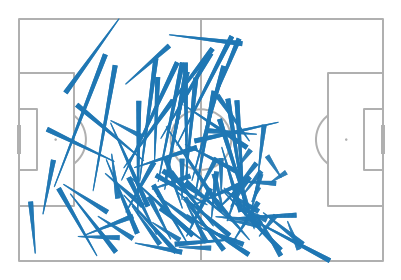

In [28]:
pitch = Pitch(pitch_type='statsbomb')
fig,ax = pitch.draw()
pitch.lines(player1.x,player1.y,player1.endX,player1.endY,comet=True,ax=ax)